In [ ]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
    from sklearn.metrics import mean_squared_error, mean_absolute_error

except:
    !pip install pandas
    !pip install numpy
    !pip install scikit-learn
    !pip install scipy

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
    from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data='/content/drive/MyDrive/california_Housing/fetch_california_housing.csv.zip'

In [ ]:
# Fetch the California housing dataset
housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

##Implement a linear regression model

###Split the dataset into training and testing sets

In [ ]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Initialize and fit the linear regression model

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred_linear = linear_regression.predict(X_test)

##Plot the actual data points and the fitted regression line

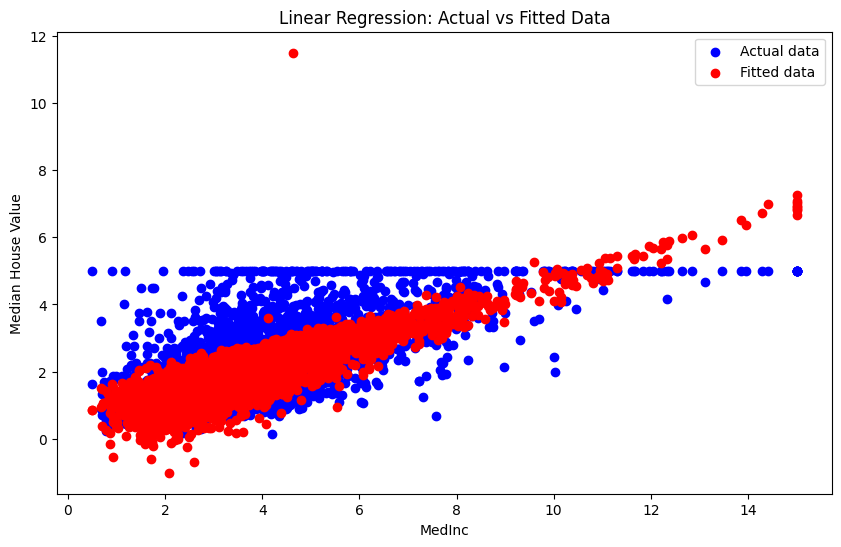

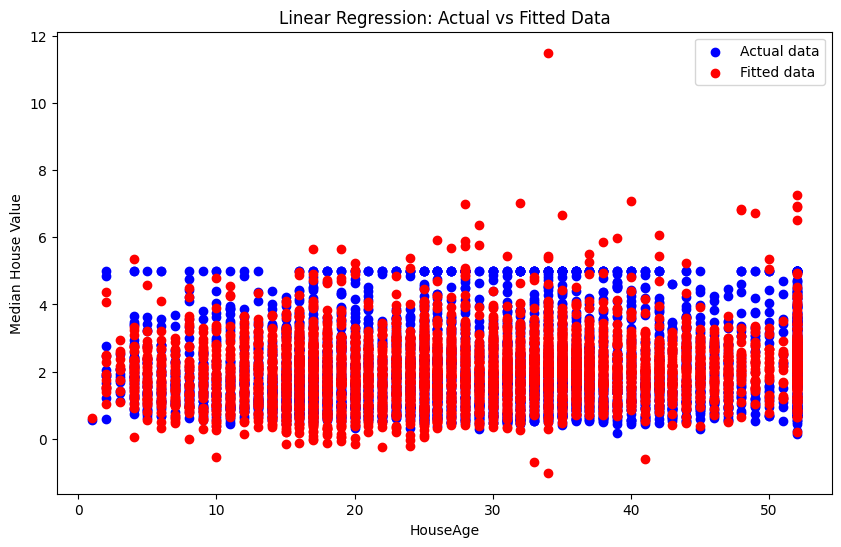

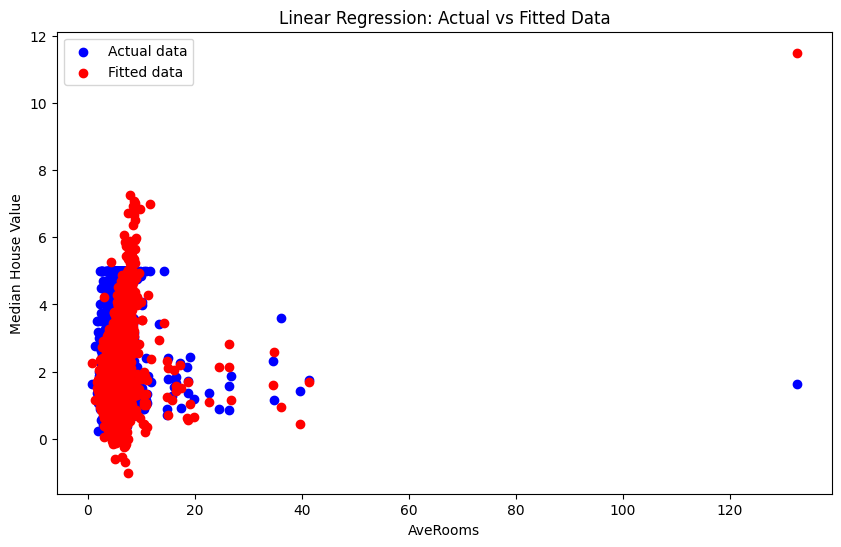

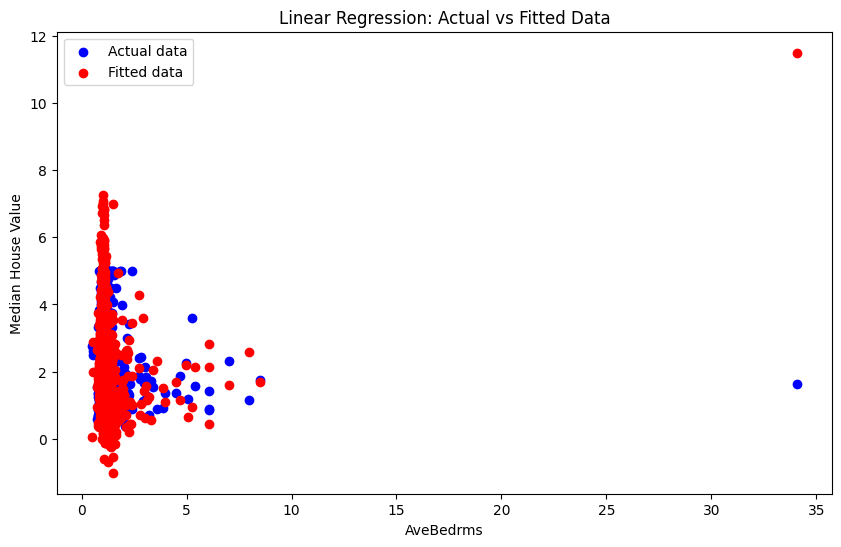

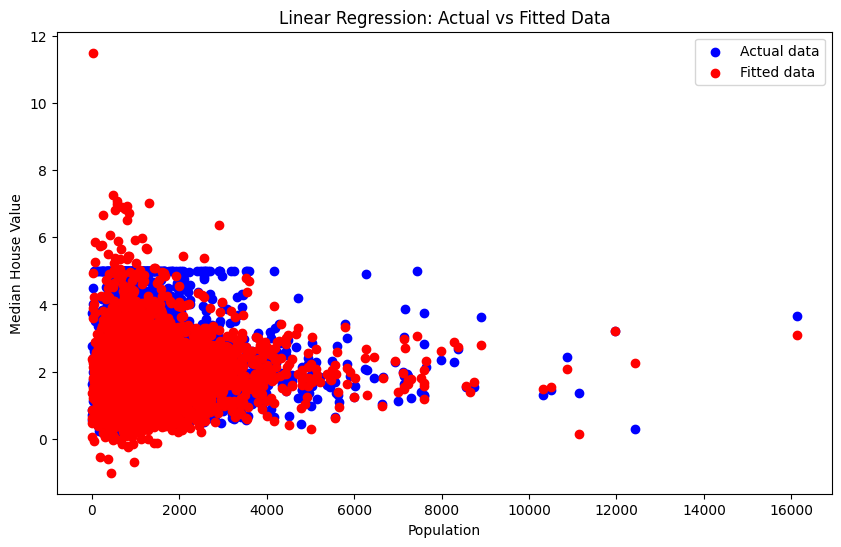

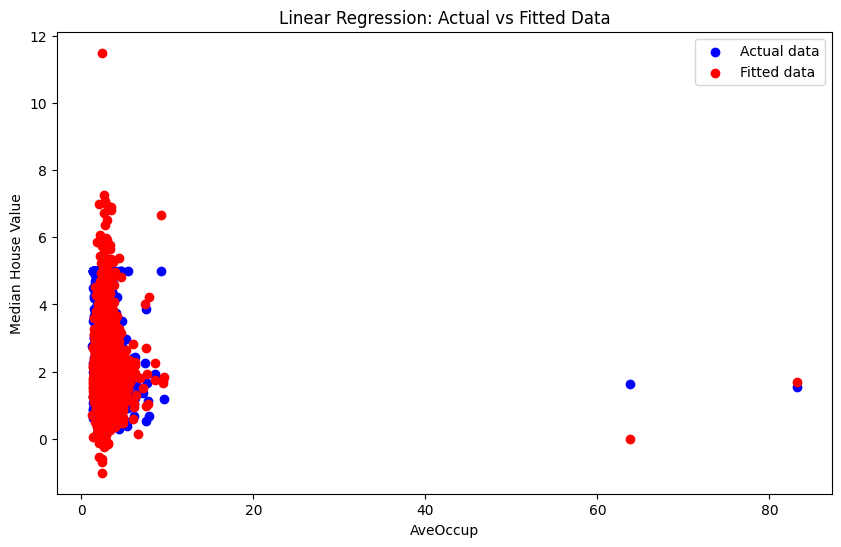

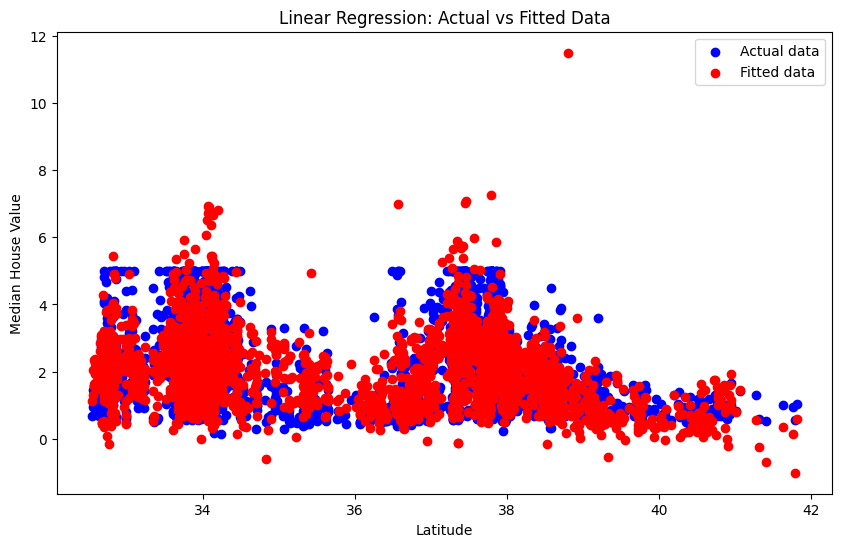

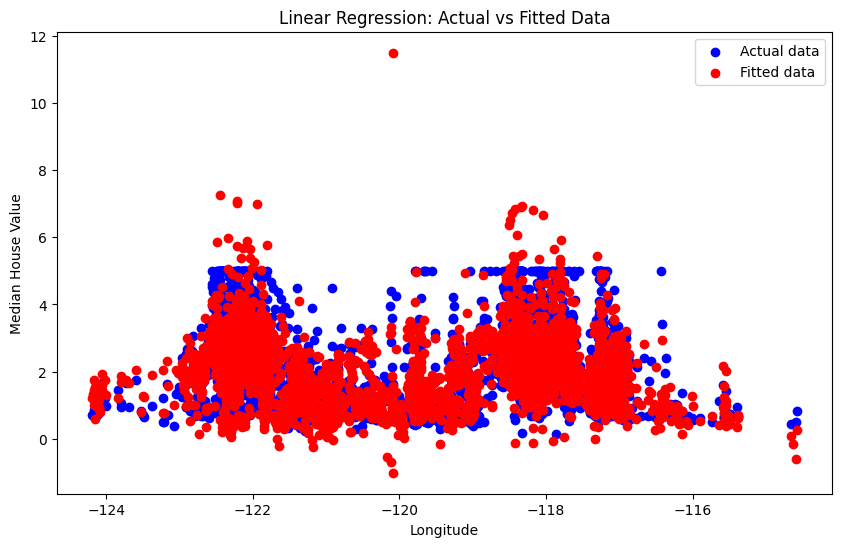

In [ ]:
for i in housing.feature_names:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[i], y_test, color='blue', label='Actual data')
    plt.scatter(X_test[i], y_pred_linear, color='red', label='Fitted data')
    plt.xlabel(i) # Dynamically set x-axis label
    plt.ylabel('Median House Value')
    plt.title('Linear Regression: Actual vs Fitted Data')
    plt.legend()
    plt.show()

##Calculate the evaluation metrics: MSE, RMSE, and MAE

In [ ]:
# Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
# Root Mean Squared Error
rmse_linear = np.sqrt(mse_linear)
# Mean Absolute Error
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"""Linear Regression:
    - MSE: {mse_linear}
    - RMSE: {rmse_linear}
    - MAE: {mae_linear}""")

Linear Regression:
    - MSE: 0.5558915986952444
    - RMSE: 0.7455813830127764
    - MAE: 0.5332001304956553


##Implement Lasso and Ridge regression models on the same dataset

###Lasso regression model

In [ ]:
# Initialize and fit the Lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Lasso Regression Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"""Lasso Regression:
    - MSE: {mse_lasso}
    - RMSE: {rmse_lasso}
    - MAE: {mae_lasso}""")

Lasso Regression:
    - MSE: 0.9380337514945427
    - RMSE: 0.9685214254184276
    - MAE: 0.7615782541669575


###Ridge regression model

In [ ]:
# Initialize and fit the Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Ridge Regression Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"""Ridge Regression:
    - MSE: {mse_ridge}
    - RMSE: {rmse_ridge}
    - MAE: {mae_ridge}""")

Ridge Regression:
    - MSE: 0.5558034669932211
    - RMSE: 0.7455222779992702
    - MAE: 0.5332039182571153


##Discuss which model performed the best and why

In [ ]:
# Summarize the evaluation metrics for comparison
metrics = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE': [mse_linear, mse_lasso, mse_ridge],
    'RMSE': [rmse_linear, rmse_lasso, rmse_ridge],
    'MAE': [mae_linear, mae_lasso, mae_ridge]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MSE,RMSE,MAE
0,Linear Regression,0.555892,0.745581,0.533200
1,Lasso Regression,0.938034,0.968521,0.761578
2,Ridge Regression,0.555803,0.745522,0.533204


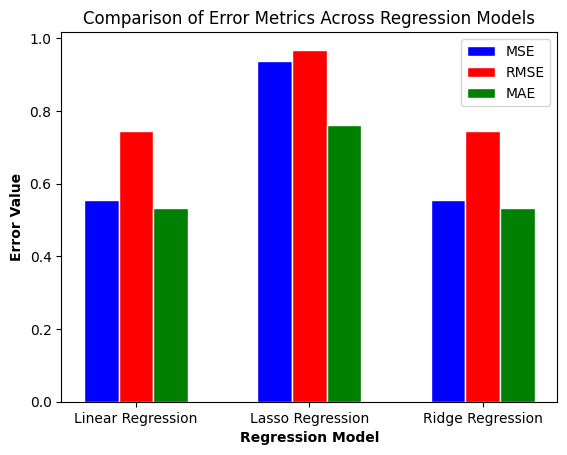

In [ ]:
# @title Comparison of Error Metrics Across Regression Models

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
mse = [0.555, 0.938, 0.556]
rmse = [0.745, 0.969, 0.746]
mae = [0.533, 0.762, 0.533]

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
plt.bar(r1, mse, color='blue', width=bar_width, edgecolor='white', label='MSE')
plt.bar(r2, rmse, color='red', width=bar_width, edgecolor='white', label='RMSE')
plt.bar(r3, mae, color='green', width=bar_width, edgecolor='white', label='MAE')

# Add xticks on the middle of the group bars
plt.xlabel('Regression Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Error Value', fontweight='bold')

# Create legend & Show graphic
plt.legend()
_ = plt.title('Comparison of Error Metrics Across Regression Models')

###Conclusion

We can conclude that Linear regression and Ridge Regression was almost given same values. By considering above values, we generally consider the best model with the lowest lowest MSE, RMSE, and MAE